# ANALYTICS OF ARTISTS

## Data reading and cleaning

In [44]:
#Importing the necessary libraries

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV/JSON file I/O
import matplotlib.pyplot as plt  # only used to set bgcolor of figure
import seaborn as sns #for plotting the swarmplot
import statistics as st #for calculating the medians
import analytics.gender #for gender recognition

In [45]:
# load data frame
df = pd.read_json("data/famousArtists.json")
print("Analyze famousArtists.json")
print("========================")
df.info()
df.head(20)

Analyze famousArtists.json
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   artist    2648 non-null   object
 1   hasImg    2648 non-null   int64 
 2   country   2648 non-null   object
 3   isGroup   2648 non-null   int64 
 4   instrs    2648 non-null   object
 5   id        2648 non-null   int64 
 6   genres    2648 non-null   object
 7   lifespan  2648 non-null   object
dtypes: int64(3), object(5)
memory usage: 165.6+ KB


,artist,hasImg,country,isGroup,instrs,id,genres,lifespan
0,James Brown,1,US,0,"voc, org",12596,"R&B, Soul",1933-2006
1,Ray Charles,1,US,0,"voc, p",30552,"R&B, Soul",1930-2004
2,Stevie Wonder,1,US,0,"key, voc",18956,"R&B, Soul",*1950
3,Aretha Franklin,1,US,0,"p, voc, bvoc",38863,"R&B, Soul",*1942
4,Marvin Gaye,1,US,0,"p, key, voc",18984,"R&B, Soul",1939-1984
5,Sam Cooke,1,US,0,voc,295202,"R&B, Soul",1931-1964
6,Fats Domino,1,US,0,"p, voc",309140,"R&B, Rock",*1928
7,Louis Jordan,1,US,0,"voc, as, sax, fl",253475,"R&B, Jazz",1908-1975
8,The Temptations,1,US,1,voc,28332,"R&B, Soul",*1960
9,Otis Redding,1,US,0,voc,132136,"R&B, Soul",1941-1967


In [46]:
#Data Manipulate:

#Take only solo musicians:
df_solo=df.loc[df.isGroup==0,]

#to replace empty string with na values
df_solo["lifespan"]=df_solo["lifespan"].replace("",np.nan)
print("\nMissing data:")
print(df_solo.isnull().sum())
print(df_solo.shape)

#to remove the NAs in lifespan column
sel=df_solo["lifespan"].isna()
df_solo=df_solo.loc[~sel,]


Missing data:
artist       0
hasImg       0
country      0
isGroup      0
instrs       0
id           0
genres       0
lifespan    50
dtype: int64
(1531, 8)


<ipython-input-46-bd165e1683c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solo["lifespan"]=df_solo["lifespan"].replace("",np.nan)


In [47]:
#Select the rows that have two numbers in their lifespan column:
sel=df_solo["lifespan"].str.contains(r"\d-\d",regex=True)

#to remove the people that have unkown birthday or are still alive
df_solo=df_solo.loc[sel,]

In [48]:
#Extract the birth and death dates and make a column out of them:
df_solo["birth"]=df_solo["lifespan"].str[0:4]
df_solo["death"]=df_solo["lifespan"].str[5:9]
df_solo.head(10)

,artist,hasImg,country,isGroup,instrs,id,genres,lifespan,birth,death
0,James Brown,1,US,0,"voc, org",12596,"R&B, Soul",1933-2006,1933,2006
1,Ray Charles,1,US,0,"voc, p",30552,"R&B, Soul",1930-2004,1930,2004
4,Marvin Gaye,1,US,0,"p, key, voc",18984,"R&B, Soul",1939-1984,1939,1984
5,Sam Cooke,1,US,0,voc,295202,"R&B, Soul",1931-1964,1931,1964
7,Louis Jordan,1,US,0,"voc, as, sax, fl",253475,"R&B, Jazz",1908-1975,1908,1975
9,Otis Redding,1,US,0,voc,132136,"R&B, Soul",1941-1967,1941,1967
12,Michael Jackson,1,US,0,"voc, bvoc",15885,"R&B, Soul",1958-2009,1958,2009
14,Curtis Mayfield,1,US,0,"g, voc",17589,"R&B, Soul",1942-1999,1942,1999
23,Bo Diddley,1,US,0,"g, voc",139669,"R&B, Blues",1928-2008,1928,2008
24,Jackie Wilson,1,US,0,voc,69375,"R&B, Soul",1934-1984,1934,1984


In [49]:
#create the age column:
df_solo["age"]=df_solo.death.astype("int64")-df_solo.birth.astype("int64")
df_solo.shape

(809, 11)

## Some Expolative Data Analysis

(array([  8.,  32.,  48.,  72.,  81., 100., 154., 165.,  95.,  54.]),
 array([ 3. , 12.3, 21.6, 30.9, 40.2, 49.5, 58.8, 68.1, 77.4, 86.7, 96. ]),
 <BarContainer object of 10 artists>)

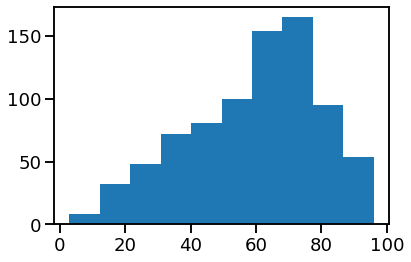

In [50]:
plt.hist(df_solo.age)

In [51]:

#function to find out if an artist was a female or a male?

def get_gender(fullname, is_group):
    if is_group == 1:
        return np.nan
    name = (
        fullname.replace("Dr. ", "")
        .replace("Mr. ", "")
        .replace("Mrs. ", "")
        .replace("Ms. ", "")
        .replace("DJ ", "")
        .replace("MC ", "")
        .replace("Little ", "")
        .replace("Slim ", "")
        .replace("Big ", "")
        .replace("Blind ", "")
        .replace("Doc ", "")
        .replace("Reverend ", "")
        .replace("The ", "")
    )
    list = name.split(" ")
    prename = list[0].upper()
    if fullname in [
        "R. Kelly",
        "LL Cool J",
        "Mos Def",
        "Busta Rhymes",
        "DMX",
        "50 Cent",
        "Red Garland",
    ]:
        return "male"
    if fullname in ["Leni Stern"]:
        return "female"
    result = np.nan
    if prename in analytics.gender.gender.keys():
        result =analytics.gender.gender[prename]
        if result == "female" or result == "male":
            return result
    # print(prename + ' - ' + fullname)
    return np.nan


In [52]:
#add gender column:
df_solo["gender"]=df_solo.apply(lambda row: get_gender(row.artist, row.isGroup), axis=1)
df_solo.gender.value_counts()

male      605
female    120
Name: gender, dtype: int64

In [53]:
#NA values in gender:
print(df_solo.isnull().sum())
df_solo=df_solo.loc[~ df_solo.gender.isna(),]

artist       0
hasImg       0
country      0
isGroup      0
instrs       0
id           0
genres       0
lifespan     0
birth        0
death        0
age          0
gender      84
dtype: int64


<AxesSubplot:title={'center':'age by gender'}, xlabel='age'>

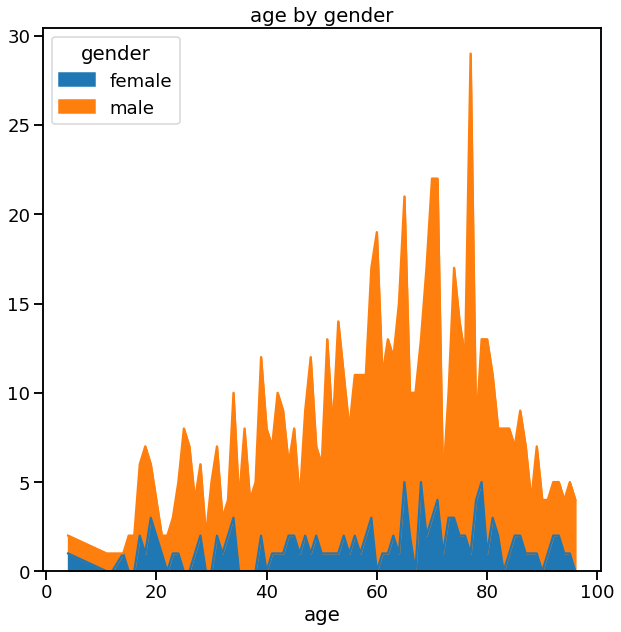

In [54]:
#Two variable Plot of age and gender:
gender_over_age = df_solo.groupby("gender")["age"].value_counts().unstack().T
gender_over_age.plot.area(
    stacked=True, figsize=(10, 10), title="age by gender"
)

artists from US:  (554, 12)


<AxesSubplot:title={'center':'age by gender'}, xlabel='age'>

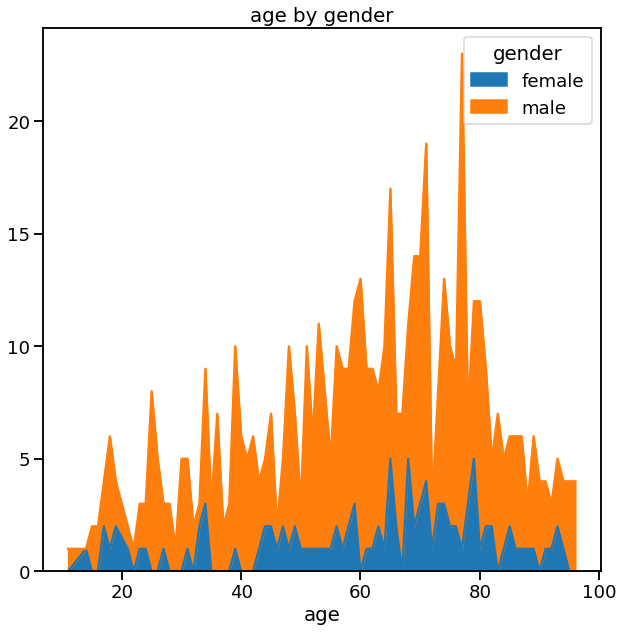

In [55]:
#Two variable Plot of age and gender only for the US:
print("artists from US: ",df_solo.loc[df_solo.country=="US",].shape)
gender_over_age = df_solo.loc[df_solo.country=="US",].groupby("gender")["age"].value_counts().unstack().T
gender_over_age.plot.area(
    stacked=True, figsize=(10, 10), title="age by gender"
)

In [56]:
#male life span in US for everybody: 76.3 years
#female life span in US for everybody: 81.1 years
print("Lifespan per gender in US:")
df_solo.loc[df_solo.country=="US",].groupby("gender")["age"].mean()

Lifespan per gender in US:


gender
female    61.495238
male      60.269488
Name: age, dtype: float64

([<matplotlib.axis.XTick at 0x1d197991c70>,
 [Text(1, 0, 'female'), Text(2, 0, 'male')])

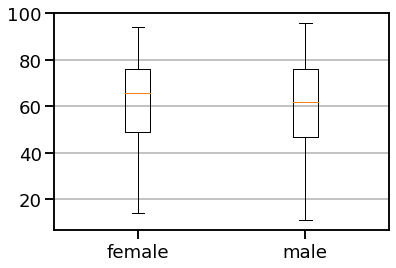

In [57]:
#Two variable plot of gender and age of musicians:

gender_over_age_female = df_solo.loc[(df_solo.country=="US") & (df_solo.gender=="female"),"age"]
gender_over_age_male = df_solo.loc[(df_solo.country=="US") & (df_solo.gender=="male"),"age"]
fig,ax=plt.subplots()
ax.boxplot([gender_over_age_female,gender_over_age_male])
ax.yaxis.grid(True)
plt.xticks(ticks=[1,2],labels=["female","male"])

## age and genre

In [58]:
#To extract the first genre in each line and put it in a new column, called genre:
df_genre=df_solo.copy()
df_genre["genre"] = df_genre["genres"].str.split(", ").str[0]
df_genre.head(10)

,artist,hasImg,country,isGroup,instrs,id,genres,lifespan,birth,death,age,gender,genre
0,James Brown,1,US,0,"voc, org",12596,"R&B, Soul",1933-2006,1933,2006,73,male,R&B
1,Ray Charles,1,US,0,"voc, p",30552,"R&B, Soul",1930-2004,1930,2004,74,male,R&B
4,Marvin Gaye,1,US,0,"p, key, voc",18984,"R&B, Soul",1939-1984,1939,1984,45,male,R&B
5,Sam Cooke,1,US,0,voc,295202,"R&B, Soul",1931-1964,1931,1964,33,male,R&B
7,Louis Jordan,1,US,0,"voc, as, sax, fl",253475,"R&B, Jazz",1908-1975,1908,1975,67,male,R&B
9,Otis Redding,1,US,0,voc,132136,"R&B, Soul",1941-1967,1941,1967,26,male,R&B
12,Michael Jackson,1,US,0,"voc, bvoc",15885,"R&B, Soul",1958-2009,1958,2009,51,male,R&B
14,Curtis Mayfield,1,US,0,"g, voc",17589,"R&B, Soul",1942-1999,1942,1999,57,male,R&B
23,Bo Diddley,1,US,0,"g, voc",139669,"R&B, Blues",1928-2008,1928,2008,80,male,R&B
24,Jackie Wilson,1,US,0,voc,69375,"R&B, Soul",1934-1984,1934,1984,50,female,R&B


In [59]:
df_genre.genre.value_counts()

Jazz          292
Blues         112
Classical      88
R&B            55
Pop            41
Country        36
Folk           25
Reggae         24
Indie Rock     12
Disco          10
Latin          10
Punk Rock      10
Hip-Hop         5
Rock            3
Electronic      2
Name: genre, dtype: int64

## Different Versions of the Data Visualization

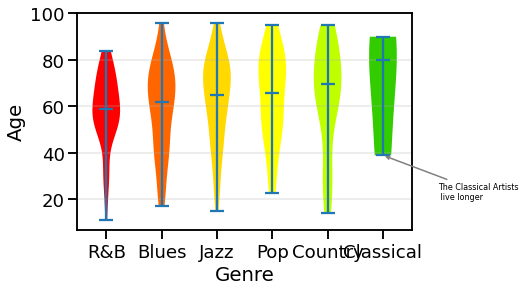

you see that the median is with R&B the lowest and with classical the highest


In [60]:
#First Version:

d_3= df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="Jazz"),"age"]
d_2 = df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="Blues"),"age"]
d_= df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="Classical"),"age"]
d_1 = df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="R&B"),"age"]
d_4= df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="Pop"),"age"]
d_5 = df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="Country"),"age"]
data=[d_1.to_list(),d_2.to_list(),d_3.to_list(),d_4.to_list(),d_5.to_list(),d_.to_list()]
fig,ax=plt.subplots()
parts=ax.violinplot(data,showmedians=True)

pallette=[(1, 0, 0),(1, 0.4, 0),(1, 0.85, 0),(1, 1, 0),(0.75, 1, 0),(0.2, 0.8, 0)]
i=0
for pc in parts['bodies']:
    #pc.set_facecolor("#fa9600")
    pc.set_facecolor(pallette[i])
    i=i+1
    #pc.set_edgecolor('black')
    pc.set_alpha(1)

    
    
plt.xticks(ticks=[1,2,3,4,5,6],labels=["R&B", "Blues", "Jazz","Pop", "Country","Classical"])
ax.yaxis.grid(True,alpha=0.3)

ax.set_ylabel('Age')
ax.set_xlabel('Genre')






plt.annotate("The Classical Artists \n live longer",(6,39),(7,20),arrowprops = {"arrowstyle":"->","color": "gray"},size = 8,color = "black")

plt.show()
print("you see that the median is with R&B the lowest and with classical the highest")

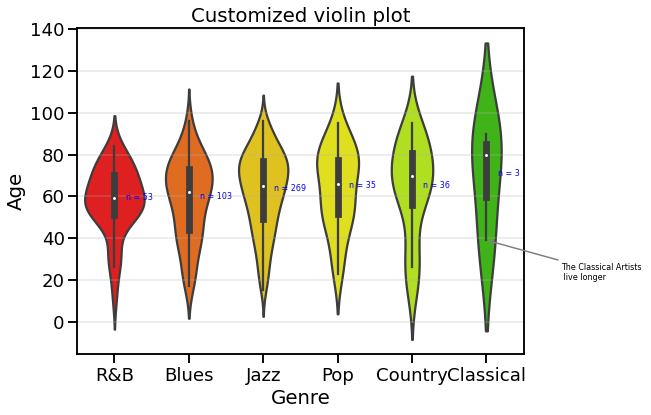

you see that the median is with R&B the lowest and with classical the highest


In [61]:
#Second Version:

d_3= df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="Jazz"),"age"]
d_2 = df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="Blues"),"age"]
d_= df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="Classical"),"age"]
d_1 = df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="R&B"),"age"]
d_4= df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="Pop"),"age"]
d_5 = df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="Country"),"age"]
data=[d_1.to_list(),d_2.to_list(),d_3.to_list(),d_4.to_list(),d_5.to_list(),d_.to_list()]
sns.set_context("talk", font_scale=1.1)
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
#ax = fig.add_subplot(111)
pallette=[(1, 0, 0),(1, 0.4, 0),(1, 0.85, 0),(1, 1, 0),(0.75, 1, 0),(0.2, 0.8, 0)]

parts=sns.violinplot(data = data, scale = "area",palette = pallette)

pallette=[(1, 0, 0),(1, 0.4, 0),(1, 0.85, 0),(1, 1, 0),(0.75, 1, 0),(0.2, 0.8, 0)]
i=0 
    


#sns.swarmplot(data=data,color="white", edgecolor="black",size = 4)

plt.xticks(ticks=[0,1,2,3,4,5],labels=["R&B", "Blues", "Jazz","Pop", "Country","Classical"])
ax.yaxis.grid(True,alpha=0.3)
ax.set_title('Customized violin plot')
ax.set_ylabel('Age')
ax.set_xlabel('Genre')

# for i in [1,2,3,4,5,6]:
#     # Add some random "jitter" to the x-axis
#     x = np.random.normal(i, 0.09, size=len(data[i-1]))
#     ax.plot(x, data[i-1], "g.")

stringlist = [f"n = {len(i)}" for i in data]
xposlist = list(range(6))
yposlist = [sum(i)/len(i)for i in data]

for i in range(len(stringlist)):
    ax.text(xposlist[i]+0.15, yposlist[i], stringlist[i],fontsize=8,color = "blue")


ax.annotate("The Classical Artists \n live longer",(5,39),(6,20),arrowprops = {"arrowstyle":"->","color": "gray"},size = 8,color = "black")

plt.show()
print("you see that the median is with R&B the lowest and with classical the highest")



C:\Users\sayye\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


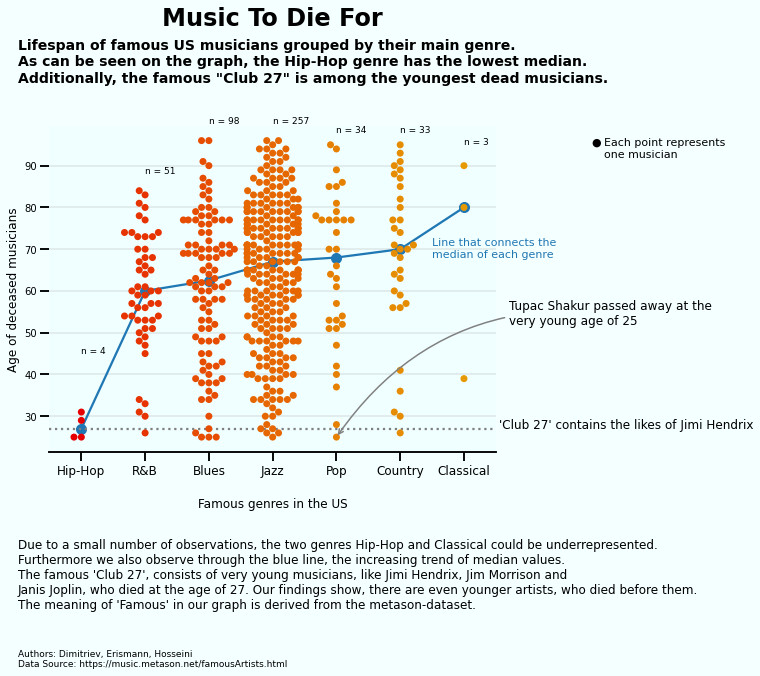

In [62]:
#Final Version:

#Remove the row with musicians younger than 25. 
#And Create the lists for each genre with musicians from US.
df_genre=df_genre[df_genre.age>=25]
d_0=df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="Hip-Hop"),"age"]
d_3= df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="Jazz"),"age"]
d_2 = df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="Blues"),"age"]
d_6= df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="Classical"),"age"]
d_1 = df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="R&B"),"age"]
d_4= df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="Pop"),"age"]
d_5 = df_genre.loc[(df_genre.country=="US") & (df_genre.genre=="Country"),"age"]



#Combining all the above into one list called data:
data=[d_0.to_list(),d_1.to_list(),d_2.to_list(),d_3.to_list(),d_4.to_list(),d_5.to_list(),d_.to_list()]




#Creating the structure of the figure:
fig = plt.figure(figsize=(8,6))
fig.patch.set_facecolor('#F0FFFF')
fig.patch.set_alpha(0.7)
ax = plt.gca()
sns.set_context("talk", font_scale=1.1)
ax.set_facecolor('#F0FFFF')
ax.grid(False)



#Different Pallettes for experimants with the color schemes:
pallette4=[(0.9, 0, 0,0.1),(0.9, 0.4, 0,0.1),(0.9, 0.85, 0,0.1),(0.9, 0.9, 0,0.1),(0.75, 0.9, 0,0.1),(0.2, 0.8, 0,0.1)]
pallette=[(0.9, 0, 0),(1, 0.4, 0),(1, 0.85, 0),(1, 1, 0),(0.75, 1, 0),(0, 1, 0)]
pallette2=[(1,1,1),(1,1,1),(1,1,1),(1,1,1),(1,1,1),(1,1,1)]
pallette3=[(0.9, 0, 0,0.16),(0.9, 0.2, 0,0.16),(0.9, 0.3, 0,0.16),(0.9, 0.4, 0,0.16),(0.9, 0.5, 0,0.16),(0.9, 0.55, 0,0.16),(0.9, 0.6, 0,0.16)]
pallette5=[(0.1,0.1,0.1,0.01),(0.1,0.1,0.1,0.01),(0.1,0.1,0.1,0.01),(0.1,0.1,0.1,0.01),(0.1,0.1,0.1,0.01),(0.1,0.1,0.1,0.01)]




#Calculating the Medians for each genre:
y=[st.median(d_0),st.median(d_1),st.median(d_2),st.median(d_3),st.median(d_4),st.median(d_5),st.median(d_6)]



#Putting the median calculated above as a point in the graph
plt.plot([0,1,2,3,4,5,6],y,marker=".", markersize=20) 



#Creating the swarmplot from data:
sns.swarmplot(data=data,palette=pallette3,size = 7,marker="o",color='#1f77b4')



#Setting and configuring the ticks, the text, the labels and annotations on the graph:
sns.despine(left=True)

plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["Hip-Hop","R&B", "Blues", "Jazz","Pop", "Country","Classical"],size=12)
plt.yticks(size=10)

ax.yaxis.grid(True,alpha=0.3)

ax.set_title('Music To Die For', pad=100,fontsize=24,fontweight='bold')

plt.text(-1,110,'Lifespan of famous US musicians grouped by their main genre.\n\
As can be seen on the graph, the Hip-Hop genre has the lowest median. \n\
Additionally, the famous "Club 27" is among the youngest dead musicians.', fontsize=14, fontweight='bold')

ax.set_ylabel('Age of deceased musicians',size=12)
ax.set_xlabel('Famous genres in the US',size=12, labelpad = 20)

plt.text(8, 95, "●", fontsize=11)
plt.text(8.2, 92, "Each point represents \none musician", fontsize=11)
ax.annotate("Tupac Shakur passed away at the \nvery young age of 25",(4,25),(6.7,52),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.3",color="grey"),size=12)
caption="Due to a small number of observations, the two genres Hip-Hop and Classical could be underrepresented. \n\
Furthermore we also observe through the blue line, the increasing trend of median values.\n\
The famous 'Club 27', consists of very young musicians, like Jimi Hendrix, Jim Morrison and \n\
Janis Joplin, who died at the age of 27. Our findings show, there are even younger artists, who died before them. \n\
The meaning of 'Famous' in our graph is derived from the metason-dataset."
plt.text(-1, -16, caption, fontsize=12)
unterschrift="Authors: Dimitriev, Erismann, Hosseini \nData Source: https://music.metason.net/famousArtists.html"
plt.text(-1, -30, unterschrift, fontsize=9)
plt.text(5.5, 68, "Line that connects the \nmedian of each genre", fontsize=11,color = '#1f77b4')
ax.axhline(27, linestyle=':', color='gray')
plt.text(6.55, 27, "'Club 27' contains the likes of Jimi Hendrix", fontsize=12)


#Writing the number of points in each genre, n=...
stringlist = [f"n = {len(i)}" for i in data]
xposlist = list(range(7))
yposlist = [45,88,100,100,98,98,95]
for i in range(len(stringlist)):
    ax.text(xposlist[i],  yposlist[i], stringlist[i],fontsize=9,color = "black")


    


#Saving and plotting the graph
fig.savefig("output.jpg",bbox_inches='tight',dpi=300)
plt.show()